In [1]:
# Yorumların çoğu kendi öğrenimim içindir.

import numpy as np # Sayısal hesaplamalar ve veri manipülasyonu için kullanılan bir kütüphanedir.
# Diziler ve matrisler üzerinde hızlı hesaplamalar yapma imkanı sağlar.

import matplotlib.pyplot as plt # Veri görselleştirme için kullanılan bir kütüphanedir. 
# Grafikler, çizimler, histogramlar, dağılım grafikleri gibi çeşitli görsel öğeler oluşturmak için kullanılır.

import pandas as pd # Veri analizi ve veri manipülasyonu için kullanılan bir kütüphanedir. 
# Veri tabloları (DataFrame) oluşturmayı ve bu tablolarda veri işlemlerini yapmayı sağlar.

from sklearn.neighbors import KNeighborsClassifier #  K-En Yakın Komşu (K-Nearest Neighbors) sınıflandırma algoritması
# için kullanılan bir sınıflandırıcıdır. Bir örneği etiketlenmiş veri kümesindeki K en yakın örneklere
# dayanarak sınıflandırmak için kullanılır.

from sklearn.model_selection import RandomizedSearchCV, train_test_split 
from sklearn.model_selection import train_test_split # Model seçimi, hiperparametre ayarlaması ve çapraz doğrulama 
# gibi model değerlendirme ve iyileştirme işlemleri için kullanılan fonksiyonları içeren bir modülüdür. 
# Veri kümesini eğitim ve test veri kümelerine ayırmak, hiperparametre optimizasyonu, 
# tekrarlı çapraz doğrulama gibi işlemleri gerçekleştirmek için kullanılır.

from sklearn.ensemble import RandomForestClassifier # Ormanlar (ensembles) olarak bilinen bir dizi karar ağacının
# birleşimiyle sınıflandırma veya regresyon yapmak için kullanılan bir sınıflandırıcıdır. 
# Birden çok karar ağacını bir araya getirerek daha iyi bir sınıflandırma performansı sağlar.

from sklearn.naive_bayes import GaussianNB # Naive Bayes sınıflandırma algoritması için kullanılan bir sınıflandırıcıdır. 
# Özellikler arasındaki bağımsızlık varsayımına dayanarak ve Bayes teoremi kullanarak sınıflandırma yapar.

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import accuracy_score #Sınıflandırma modellerinin performansını değerlendirmek için kullanılan 
# metrikleri ve performans gösterimlerini içeren bir modüldür. Doğruluk, karışıklık matrisi, 
# hassasiyet, geri çağırma gibi metrikleri hesaplamak ve görselleştirmek için kullanılır.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.svm import SVC # # Destek Vektör Makineleri (Support Vector Machines) 
# algoritması için kullanılan bir sınıflandırıcıdır.
# Veri noktalarını sınıflandırmak için sınırlayıcı hiper düzlemler oluşturur 

from scipy.stats import randint #Olasılık dağılımları ve istatistiksel fonksiyonları içeren bir kütüphanedir. 
# Burada, rastgele bir tamsayı üretmek için randint fonksiyonu kullanılıyor.

import h5py # Hierarchical Data Format (HDF) veri dosyalarını okumak ve yazmak için kullanılan bir kütüphanedir.
# HDF5 dosyasındaki verilere erişim sağlar.

dosya = h5py.File("Odev.mat", "r")
# "Odev.mat" adlı dosya h5py modülü kullanılarak okunuyor.

veri = dosya["Features_Frequency_Alpha_Valence"][:]
# "Odev.mat" dosyasındaki "Features_Frequency_Alpha_Valence" veri kümesi yükleniyor.

df = pd.DataFrame(veri)
# Veri kümesi bir pandas DataFrame'e dönüştürülüyor.

dizi = np.transpose(df)
# DataFrame üzerinde transpoz işlemi yapılıyor.

X = dizi.iloc[:, 0:1308].values
# Bağımsız değişkenler (X) dizi DataFrame'inin 0-1307 sütunlarından alınıyor.

y = dizi.iloc[:, [1308]].values.ravel()
# Hedef değişken (y) dizi DataFrame'inin 1308. sütunundan alınıyor ve düzleştirilerek bir vektöre dönüştürülüyor.

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
# Veri kümesi, eğitim ve test veri kümelerine ayrılıyor. random_state=1 ile rastgele ayrılma işlemi 
# tekrarlanabilir hale getiriliyor.


# NaiveBayes

In [11]:

model = GaussianNB()
# Gaussian Naive Bayes (GNB) sınıflandırıcı modeli oluşturuluyor.

model.fit(Xtrain, ytrain)
# Model, eğitim veri kümesi (Xtrain, ytrain) üzerinde eğitiliyor.

y_model = model.predict(Xtest)
# Test veri kümesi (Xtest) üzerinde tahmin yapılıyor.

result1 = accuracy_score(ytest, y_model)
# Tahminlerin doğruluğu hesaplanıyor.

print(result1)
# Doğruluk oranı (accuracy) yazdırılıyor.


0.59375


# kNN

In [3]:
knn = KNeighborsClassifier(n_neighbors = 7)
# K-Nearest Neighbors (KNN) sınıflandırıcı modeli oluşturuluyor.
# n_neighbors=7 parametresi, 7 en yakın komşuyu dikkate alacak şekilde ayarlanıyor.

knn.fit(Xtrain, ytrain)
# Model, eğitim veri kümesi (Xtrain, ytrain) üzerinde eğitiliyor.

s2 = knn.predict(Xtest)
# Test veri kümesi (Xtest) üzerinde tahmin yapılıyor.

result2 = accuracy_score(ytest, s2)
# Tahminlerin doğruluğu hesaplanıyor.

print(result2)
# Doğruluk oranı (accuracy) yazdırılıyor.


0.571875


# SVM

In [4]:
classifier = SVC(kernel='linear', random_state = 0)  
# SVC (Support Vector Classifier) sınıflandırıcı modeli oluşturuluyor. 'linear' çekirdek kullanılıyor.
# random_state = 0 parametresi, her çalıştırıldığında aynı sonuçların elde edilmesini sağlar.

classifier.fit(Xtrain, ytrain)  
# Model, eğitim veri kümesi (Xtrain, ytrain) üzerinde eğitiliyor.

ypred = classifier.predict(Xtest)  
# Test veri kümesi (Xtest) üzerinde tahmin yapılıyor.

result3 = accuracy_score(ytest, ypred)  
# Tahminlerin doğruluğu hesaplanıyor.

print(result3)  
# Doğruluk oranı (accuracy) yazdırılıyor.


0.61875


# RandomForest

In [20]:
rF = RandomForestClassifier(random_state = 0)  # Random Forest sınıflandırıcı modeli oluşturuluyor.
rF.fit(Xtrain, ytrain)  # Model, eğitim veri kümesi (Xtrain, ytrain) üzerinde eğitiliyor.

yFpred = rF.predict(Xtest)  # Test veri kümesi (Xtest) üzerinde tahmin yapılıyor.

accuracy = accuracy_score(ytest, yFpred)  # Tahminlerin doğruluğu hesaplanıyor.
print("Accuracy = ", accuracy)  # Doğruluk oranı (accuracy) yazdırılıyor.

Accuracy =  0.640625


# LDA

In [18]:
model = LinearDiscriminantAnalysis()  # Linear Discriminant Analysis (LDA) sınıflandırıcı modeli oluşturuluyor.
model.fit(X, y)  # Model, veri kümesi X ve hedef değişkeni y üzerinde eğitiliyor.

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 1)
# Çapraz doğrulama için RepeatedStratifiedKFold kullanılıyor. 
# Veri kümesi belirtilen sayıda kategoriye (n_splits) ve tekrar sayısına (n_repeats) göre parçalara ayrılıyor.

scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
# cross_val_score fonksiyonu, çapraz doğrulama ile modelin performansını değerlendirir.
# Model ve veri kümesi kullanılarak doğruluk oranı (accuracy) skoru hesaplanır.

print(np.mean(scores))
# cross_val_score tarafından hesaplanan doğruluk oranı skorlarının ortalaması alınır ve yazdırılır.


0.5302083333333333


# Bar Graphic

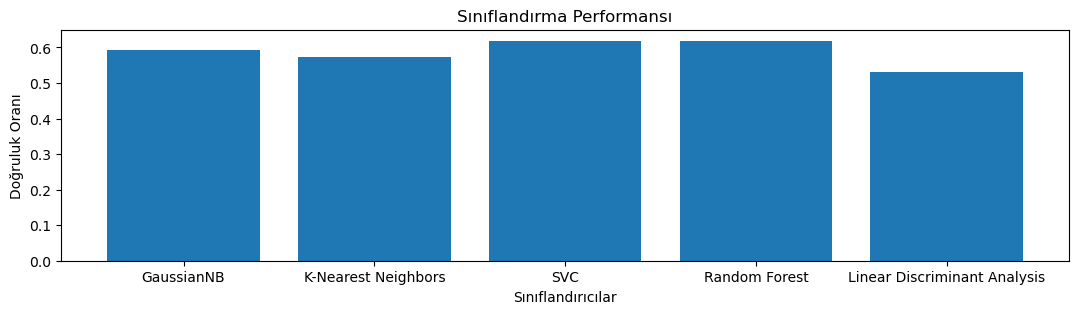

In [7]:
# Başarı oranlarını ve sınıflandırıcı adlarını içeren listeler
accuracies = [result1, result2, result3, accuracy, np.mean(scores)]
classifiers = ['GaussianNB', 'K-Nearest Neighbors', 'SVC', 'Random Forest', 'Linear Discriminant Analysis']

# Bar plot oluşturma
plt.figure(figsize = (13, 3))
plt.bar(classifiers, accuracies)

# Eksen etiketleri ve başlık ekleme
plt.xlabel('Sınıflandırıcılar')
plt.ylabel('Doğruluk Oranı')
plt.title('Sınıflandırma Performansı')

# Görselin ekrana çizdirilmesi
plt.show()


# Radial Graphic

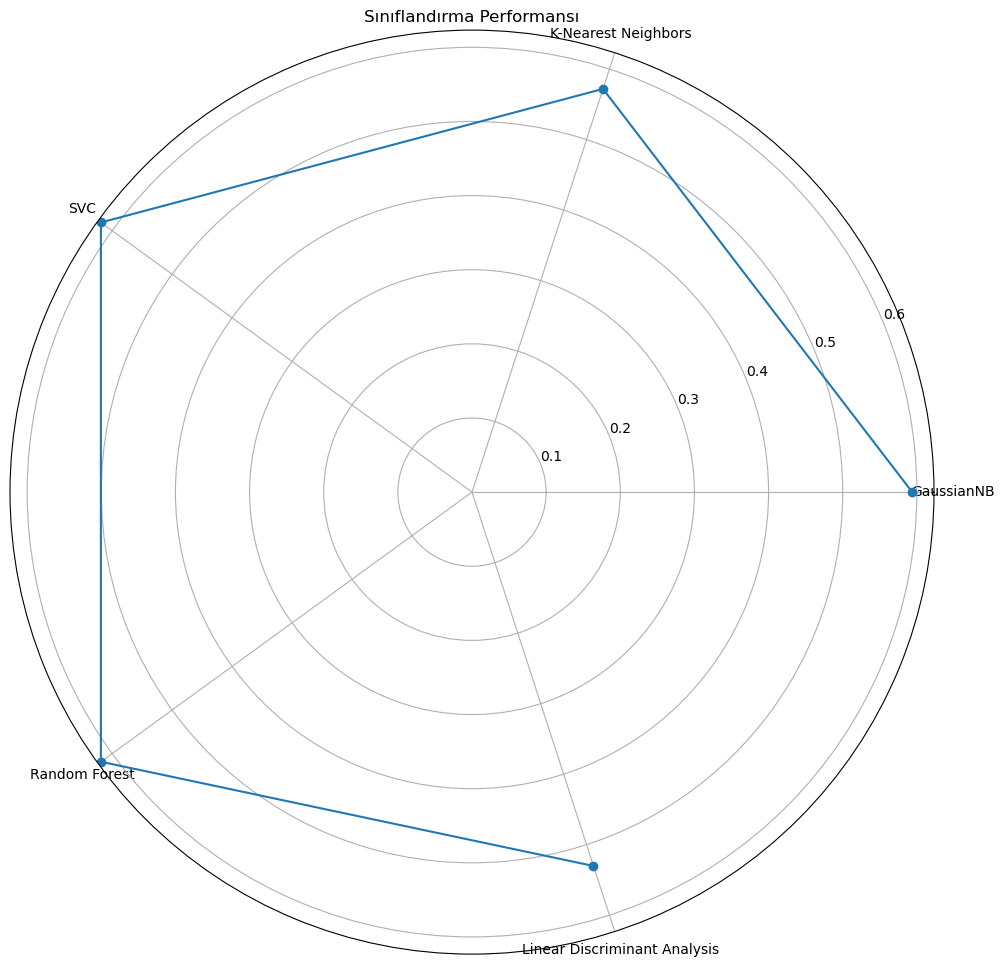

In [8]:
# Başarı oranlarını ve sınıflandırıcı adlarını içeren listeler
accuracies = [result1, result2, result3, accuracy, np.mean(scores)]
classifiers = ['GaussianNB', 'K-Nearest Neighbors', 'SVC', 'Random Forest', 'Linear Discriminant Analysis']

# Polar plot oluşturma
theta = np.linspace(0, 2 * np.pi, len(classifiers), endpoint=False)
radii = accuracies

plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar = True)
ax.plot(theta, radii, marker = 'o')

# Sınıflandırıcı adlarını etiket olarak ekleme
ax.set_xticks(theta)
ax.set_xticklabels(classifiers)

# Başlık ekleme
plt.title('Sınıflandırma Performansı')

# Görselin ekrana çizdirilmesi
plt.show()
